## 1. Notebook Setup:

### 1.1 Needed imports:

In [10]:
import os
import ast
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt


### 1.2 Load script variables:

In [11]:
# Load .env file
load_dotenv()

# Enviroment variable
__PATH_TO_REPOSITORY__ = os.getenv("PATH_TO_REPOSITORY")

# Paths for diffrent data-files
__PATHS__ = {
    "evaluation": {
        "full_segment": f"{__PATH_TO_REPOSITORY__}/csv/eval/full_segment/full_eval_segments.csv",
        "orginal_segment": f"{__PATH_TO_REPOSITORY__}/data/labels/eval_segments.csv",
        "preprocessed_segment": f"{__PATH_TO_REPOSITORY__}/csv/eval/preprocessed_segment/preprocessed_eval_segments.csv"
    },
    "balanced": {
        "full_segment": f"{__PATH_TO_REPOSITORY__}/csv/balanced_train/full_segment/full_balanced_train_segments.csv",
        "orginal_segment": f"{__PATH_TO_REPOSITORY__}/data/labels/balanced_train_segments.csv",
        "preprocessed_segment": f"{__PATH_TO_REPOSITORY__}/csv/balanced_train/preprocessed_segment/preprocessed_balanced_train_segments.csv"
    },
    "unbalanced": {
        "full_segment": f"{__PATH_TO_REPOSITORY__}/csv/unbalanced_train/full_segment/full_unbalanced_train_segments.csv", 
        "orginal_segment": f"{__PATH_TO_REPOSITORY__}/data/labels/unbalanced_train_segments.csv",
        "preprocessed_segment": f"{__PATH_TO_REPOSITORY__}/csv/unbalanced_train/preprocessed_segment/preprocessed_unbalanced_train_segments.csv"
    }
}
__PATH_FOR_FIGURES__ = f"{__PATH_TO_REPOSITORY__}/files/"

### 1.3 Load dataframes

Evaluation dataframes:

In [12]:
eval_orginal_segment = pd.read_csv(__PATHS__["evaluation"]["orginal_segment"], sep=";")
eval_full_segment = pd.read_csv(__PATHS__["evaluation"]["full_segment"])
eval_preprocessed_segment = pd.read_csv(__PATHS__["evaluation"]["preprocessed_segment"])

Balanced train dataframes:

In [13]:
balanced_orginal_segment = pd.read_csv(__PATHS__["balanced"]["orginal_segment"], sep=";")
balanced_full_segment = pd.read_csv(__PATHS__["balanced"]["full_segment"])
balanced_preprocessed_segment = pd.read_csv(__PATHS__["balanced"]["preprocessed_segment"])

Unbalanced train dataframes:

In [14]:
unbalanced_orginal_segment = pd.read_csv(__PATHS__["unbalanced"]["orginal_segment"], sep=";")
unbalanced_full_segment = pd.read_csv(__PATHS__["unbalanced"]["full_segment"])
unbalanced_preprocessed_segment = pd.read_csv(__PATHS__["unbalanced"]["preprocessed_segment"])

## 1. Data Analysis:

### 1.1 Barplots

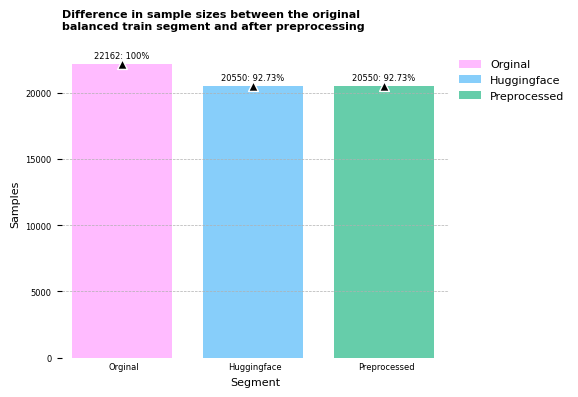

In [15]:
# Erstelle eine größere Figur und Achse
figsize = (5, 4)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

# Labels und Werte
labels = ['Orginal', 'Huggingface', 'Preprocessed']
values = [len(balanced_orginal_segment),len(balanced_full_segment), len(balanced_preprocessed_segment)]
percentages = ["100%",f"{round(((len(balanced_full_segment) / len(balanced_orginal_segment)) * 100),2)}%", f"{round((( len(balanced_preprocessed_segment) / len(balanced_orginal_segment)) * 100),2)}%"]

# Labels und Werte
labels = ['Orginal', 'Huggingface', 'Preprocessed']
# Erstelle den Barplot und speichere die Balkenobjekte
bars = ax.bar(labels, values, color=['#ffbbff','#87cefa','#66cdaa'], label=labels)  # labels hier zuweisen

# Achsen-Labels und Titel
ax.set_xlabel('Segment', fontsize=8)
ax.set_ylabel('Samples', fontsize=8)
ax.set_title('Difference in sample sizes between the original\nbalanced train segment and after preprocessing', 
             loc='left', fontsize=8, pad=15, fontweight='bold')

# Legende
ax.legend(title=None, loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False, fontsize=8)

# Abstand zwischen den Balken (spacing)
spacing = 1.05  # Abstand zwischen den Balken

# Hole die x-Position jedes Balkens und verschiebe sie
for i, bar in enumerate(bars):
    current_x = bar.get_x()
    new_x = current_x * spacing  # Verschiebe jeden Balken um 'spacing' weiter
    bar.set_x(new_x)  # Setze die neue x-Position

# Hole die aktuellen Ticks und aktualisiere sie, um die Balken zentral zu positionieren
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
new_xticks = [tick * spacing for tick in xticks]
ax.set_xticks(new_xticks)
ax.set_xticklabels(xticklabels, fontsize=6)

# Entferne die Tick-Striche auf der x-Achse
ax.tick_params(axis='x', which='both', length=0)

# Setze die x-Achsen-Grenzen basierend auf den neuen x-Ticks
ax.set_xlim(min(new_xticks) - 0.5, max(new_xticks) + 0.5)

# X-Ticks rotieren
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Balken beschriften und kleine Dreiecke hinzufügen
for i, bar in enumerate(bars):
    bar_height = bar.get_height()  # Höhe des Balkens
    bar_x = bar.get_x() + bar.get_width() / 2  # X-Position des Balkens (Mitte des Balkens)
    
    # Zeichne den Punkt auf dem Balken
    ax.scatter(bar_x, bar_height, color='black', zorder=1, s=50, edgecolors='white', linewidth=1, marker="^")
    
    # Text oberhalb des Balkens anzeigen, Abstand vergrößern
    ax.text(
        bar_x,  # X-Position (Zentrum des Balkens)
        bar_height + (bar_height/70),  # Y-Position (jetzt weiter oben als vorher, mit Abstand)
        f"{round(bar.get_height(), 3)}: {percentages[i]}" ,  # Der Text (Spaltenname)
        ha='center',  # Horizontale Ausrichtung (zentriert)
        va='bottom',  # Vertikale Ausrichtung (über dem Balken)
        fontsize=6,  # Schriftgröße
        color='black',  # Schriftfarbe
    )

# Grid hinzufügen
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Setze die Schriftgröße der y-Achsen-Ticks auf 4
ax.tick_params(axis='y', labelsize=6)

filename = f"{__PATH_FOR_FIGURES__}balanced_segment_comparison.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)

# Zeige den Plot
plt.show()

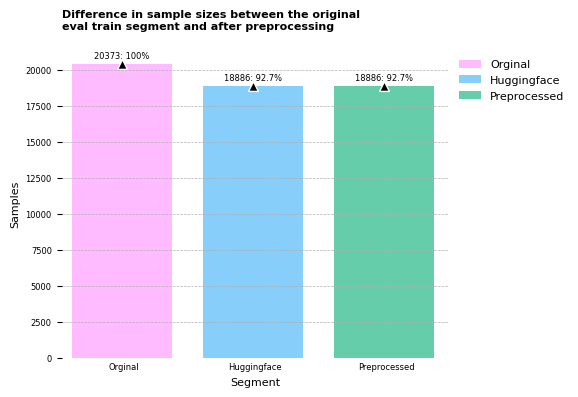

In [16]:
# Erstelle eine größere Figur und Achse
figsize = (5, 4)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

# Labels und Werte
labels = ['Orginal', 'Huggingface', 'Preprocessed']
values = [len(eval_orginal_segment), len(eval_full_segment), len(eval_preprocessed_segment)]
percentages = ["100%",f"{round(((len(eval_full_segment) / len(eval_orginal_segment)) * 100),2)}%", f"{round((( len(eval_preprocessed_segment) / len(eval_orginal_segment)) * 100),2)}%"]




# Erstelle den Barplot und speichere die Balkenobjekte
bars = ax.bar(labels, values, color=['#ffbbff','#87cefa','#66cdaa'], label=labels)  # labels hier zuweisen

# Achsen-Labels und Titel
ax.set_xlabel('Segment', fontsize=8)
ax.set_ylabel('Samples', fontsize=8)
ax.set_title('Difference in sample sizes between the original\neval train segment and after preprocessing', 
             loc='left', fontsize=8, pad=15, fontweight='bold')

# Legende
ax.legend(title=None, loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False, fontsize=8)

# Abstand zwischen den Balken (spacing)
spacing = 1.05  # Abstand zwischen den Balken

# Hole die x-Position jedes Balkens und verschiebe sie
for i, bar in enumerate(bars):
    current_x = bar.get_x()
    new_x = current_x * spacing  # Verschiebe jeden Balken um 'spacing' weiter
    bar.set_x(new_x)  # Setze die neue x-Position

# Hole die aktuellen Ticks und aktualisiere sie, um die Balken zentral zu positionieren
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
new_xticks = [tick * spacing for tick in xticks]
ax.set_xticks(new_xticks)
ax.set_xticklabels(xticklabels, fontsize=6)

# Entferne die Tick-Striche auf der x-Achse
ax.tick_params(axis='x', which='both', length=0)

# Setze die x-Achsen-Grenzen basierend auf den neuen x-Ticks
ax.set_xlim(min(new_xticks) - 0.5, max(new_xticks) + 0.5)

# X-Ticks rotieren
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Balken beschriften und kleine Dreiecke hinzufügen
for i, bar in enumerate(bars):
    bar_height = bar.get_height()  # Höhe des Balkens
    bar_x = bar.get_x() + bar.get_width() / 2  # X-Position des Balkens (Mitte des Balkens)
    
    # Zeichne den Punkt auf dem Balken
    ax.scatter(bar_x, bar_height, color='black', zorder=1, s=50, edgecolors='white', linewidth=1, marker="^")
    
    # Text oberhalb des Balkens anzeigen, Abstand vergrößern
    ax.text(
        bar_x,  # X-Position (Zentrum des Balkens)
        bar_height + (bar_height/70),  # Y-Position (jetzt weiter oben als vorher, mit Abstand)
        f"{round(bar.get_height(), 3)}: {percentages[i]}" ,  # Der Text (Spaltenname)
        ha='center',  # Horizontale Ausrichtung (zentriert)
        va='bottom',  # Vertikale Ausrichtung (über dem Balken)
        fontsize=6,  # Schriftgröße
        color='black',  # Schriftfarbe
    )

# Grid hinzufügen
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Setze die Schriftgröße der y-Achsen-Ticks auf 4
ax.tick_params(axis='y', labelsize=6)


filename = f"{__PATH_FOR_FIGURES__}eval_segment_comparison.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)

# Zeige den Plot
plt.show()

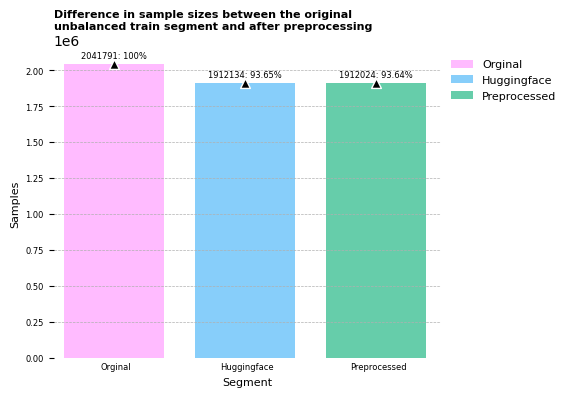

In [17]:
# Erstelle eine größere Figur und Achse
figsize = (5, 4)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

# Labels und Werte
labels = ['Orginal', 'Huggingface', 'Preprocessed']
values = [len(unbalanced_orginal_segment),len(unbalanced_full_segment), len(unbalanced_preprocessed_segment)]
percentages = ["100%",f"{round(((len(unbalanced_full_segment) / len(unbalanced_orginal_segment)) * 100),2)}%", f"{round((( len(unbalanced_preprocessed_segment) / len(unbalanced_orginal_segment)) * 100),2)}%"]

# Erstelle den Barplot und speichere die Balkenobjekte
bars = ax.bar(labels, values, color=['#ffbbff','#87cefa','#66cdaa'], label=labels)  # labels hier zuweisen

# Achsen-Labels und Titel
ax.set_xlabel('Segment', fontsize=8)
ax.set_ylabel('Samples', fontsize=8)
ax.set_title('Difference in sample sizes between the original\nunbalanced train segment and after preprocessing', 
             loc='left', fontsize=8, pad=15, fontweight='bold')

# Legende
ax.legend(title=None, loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False, fontsize=8)

# Abstand zwischen den Balken (spacing)
spacing = 1.05  # Abstand zwischen den Balken

# Hole die x-Position jedes Balkens und verschiebe sie
for i, bar in enumerate(bars):
    current_x = bar.get_x()
    new_x = current_x * spacing  # Verschiebe jeden Balken um 'spacing' weiter
    bar.set_x(new_x)  # Setze die neue x-Position

# Hole die aktuellen Ticks und aktualisiere sie, um die Balken zentral zu positionieren
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
new_xticks = [tick * spacing for tick in xticks]
ax.set_xticks(new_xticks)
ax.set_xticklabels(xticklabels, fontsize=6)

# Entferne die Tick-Striche auf der x-Achse
ax.tick_params(axis='x', which='both', length=0)

# Setze die x-Achsen-Grenzen basierend auf den neuen x-Ticks
ax.set_xlim(min(new_xticks) - 0.5, max(new_xticks) + 0.5)

# X-Ticks rotieren
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Balken beschriften und kleine Dreiecke hinzufügen
for i, bar in enumerate(bars):
    bar_height = bar.get_height()  # Höhe des Balkens
    bar_x = bar.get_x() + bar.get_width() / 2  # X-Position des Balkens (Mitte des Balkens)
    
    # Zeichne den Punkt auf dem Balken
    ax.scatter(bar_x, bar_height, color='black', zorder=1, s=50, edgecolors='white', linewidth=1, marker="^")
    
    # Text oberhalb des Balkens anzeigen, Abstand vergrößern
    ax.text(
        bar_x,  # X-Position (Zentrum des Balkens)
        bar_height + (bar_height/70),  # Y-Position (jetzt weiter oben als vorher, mit Abstand)
        f"{round(bar.get_height(), 3)}: {percentages[i]}" ,  # Der Text (Spaltenname)
        ha='center',  # Horizontale Ausrichtung (zentriert)
        va='bottom',  # Vertikale Ausrichtung (über dem Balken)
        fontsize=6,  # Schriftgröße
        color='black',  # Schriftfarbe
    )

# Grid hinzufügen
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Setze die Schriftgröße der y-Achsen-Ticks auf 4
ax.tick_params(axis='y', labelsize=6)

filename = f"{__PATH_FOR_FIGURES__}unbalanced_segment_comparison.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)

# Zeige den Plot
plt.show()

### 1.2 Class balance for preprocessed eval and balanced segment

The released dataset constitutes a subset of the collected material:
Only “present” ratings are represented in the release. Rating was
conducted with an effort to maximize balance across audio event
labels. However, since segments can be labeled with multiple audio events (including the always-rated “Speech” and “Music”), certain labels appear much more frequently. A second objective was
to avoid drawing more than one segment from any given video, to
avoid correlation of examples.
These objectives were achieved by iteratively adding segments
for the least-represented class (for which further examples are available). Out of the set of candidate segments for this audio event class,
preference is given to segments bearing the greatest number of labels. We also provide maximally-balanced train and test subsets
(from disjoint videos), <b>chosen to provide at least 50 positive examples (in both subsets) for as many classes as possible</b>. These sets
were constructed by first collecting examples for the rarest classes,
then moving on to less-rare classes and adding more segments only
where they had not already passed the threshold of 50. Even so,
very common labels such as “Music” ended up with more than 5000
labels.
The resulting dataset includes 1,789,621 segments (4,971
hours), comprising at least 100 instances for 485 audio event categories. The remaining categories are either excluded (blacklisted /
abstract as described in section 2.1), or difficult to find using our current approaches. We will continue to develop methods for proposing
segments for rating, and aim eventually to cover all non-excluded
classes. The unbalanced train set contains 1,771,873 segments and
the evaluation set contains 17,748. Because single segments can
have multiple labels (on average 2.7 labels per segment), the overall
count of labels is not uniform, and is distributed as shown in Fig. 3.
“Music” is particularly common, present in 56% of the segments.[[Source]](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7952261) Page 
779

#### 1.2.1 Balanced preprocessed train subset of data

In [18]:
# Falls die Labels als Strings im Format einer Liste gespeichert sind, dann konvertiere sie in echte Listen
original_labels= balanced_preprocessed_segment['positive_labels_names'].apply(ast.literal_eval)


# Entpacken der Label-IDs korrekt, ohne zusätzliche Zeichen
all_labels = [label for labels in original_labels for label in labels]

# Zähln der Häufigkeit der einzelnen Labels
label_counts = pd.Series(all_labels).value_counts()
# Berechnen der Prozentsätze für jede Klasse
label_percentages = label_counts / len(all_labels) * 100
# Anzeigen der Klassenbalance
class_balance = pd.DataFrame({
    'Class': label_counts.index,
    'Count': label_counts.values,
    'Percentage': label_percentages.values
})

# Anzeigen der Balance-Tabelle
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Class Balance Overview", dataframe=class_balance)

Class Balance Overview


/tmp/ipykernel_3872652/1619528330.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


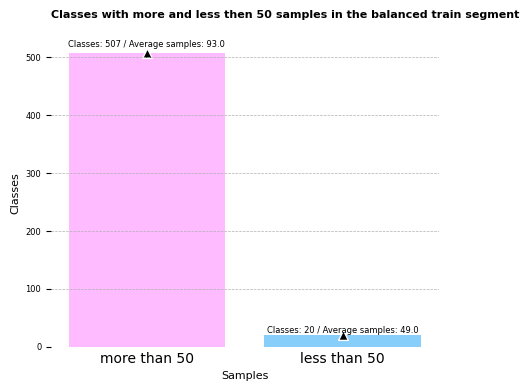

In [25]:
# Erstelle eine größere Figur und Achse
figsize = (5, 4)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

# Erstelle eine zusätzliche Spalte für die Gruppierung
class_balance['Group'] = class_balance['Count'].apply(lambda x: 'Count > 50' if x > 50 else 'Count <= 50')

# Labels und Werte
labels = ['more than 50', 'less than 50']
values = [len(class_balance[class_balance['Group'] == 'Count > 50']),len(class_balance[class_balance['Group'] == 'Count <= 50'])]

# Labels und Werte
# Erstelle den Barplot und speichere die Balkenobjekte
bars = ax.bar(labels, values, color=['#ffbbff','#87cefa'], label=labels)  # labels hier zuweisen

# Achsen-Labels und Titel
ax.set_xlabel('Samples', fontsize=8)
ax.set_ylabel('Classes', fontsize=8)
ax.set_title('Classes with more and less then 50 samples in the balanced train segment', 
             loc='left', fontsize=8, pad=15, fontweight='bold')

# Entferne die Tick-Striche auf der x-Achse
ax.tick_params(axis='x', which='both', length=0)

# X-Ticks rotieren
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

means=[class_balance[class_balance['Group'] == 'Count > 50']['Count'].mean(), class_balance[class_balance['Group'] == 'Count <= 50']['Count'].mean()]
# Balken beschriften und kleine Dreiecke hinzufügen
for i, bar in enumerate(bars):
    bar_height = bar.get_height()  # Höhe des Balkens
    bar_x = bar.get_x() + bar.get_width() / 2  # X-Position des Balkens (Mitte des Balkens)
    
    # Zeichne den Punkt auf dem Balken
    ax.scatter(bar_x, bar_height, color='black', zorder=1, s=50, edgecolors='white', linewidth=1, marker="^")
    
    # Text oberhalb des Balkens anzeigen, Abstand vergrößern
    ax.text(
        bar_x,  # X-Position (Zentrum des Balkens)
        bar_height + (bar_height/70),  # Y-Position (jetzt weiter oben als vorher, mit Abstand)
        f"Classes: {round(bar.get_height(), 3)} / Average samples: {round(means[i],0)}" ,  # Der Text (Spaltenname)
        ha='center',  # Horizontale Ausrichtung (zentriert)
        va='bottom',  # Vertikale Ausrichtung (über dem Balken)
        fontsize=6,  # Schriftgröße
        color='black',  # Schriftfarbe
    )

# Grid hinzufügen
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Setze die Schriftgröße der y-Achsen-Ticks auf 4
ax.tick_params(axis='y', labelsize=6)

filename = f"{__PATH_FOR_FIGURES__}class_balance_balanced_segment.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)

# Zeige den Plot
plt.show()

#### 1.2.2 Eval preprocessed subset of data

In [20]:
# Falls die Labels als Strings im Format einer Liste gespeichert sind, dann konvertiere sie in echte Listen
original_labels= eval_preprocessed_segment['positive_labels_names'].apply(ast.literal_eval)


# Entpacken der Label-IDs korrekt, ohne zusätzliche Zeichen
all_labels = [label for labels in original_labels for label in labels]

# Zähln der Häufigkeit der einzelnen Labels
label_counts = pd.Series(all_labels).value_counts()
# Berechnen der Prozentsätze für jede Klasse
label_percentages = label_counts / len(all_labels) * 100
# Anzeigen der Klassenbalance
class_balance = pd.DataFrame({
    'Class': label_counts.index,
    'Count': label_counts.values,
    'Percentage': label_percentages.values
})

# Anzeigen der Balance-Tabelle
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Class Balance Overview", dataframe=class_balance)

Class Balance Overview


/tmp/ipykernel_3872652/2302106238.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


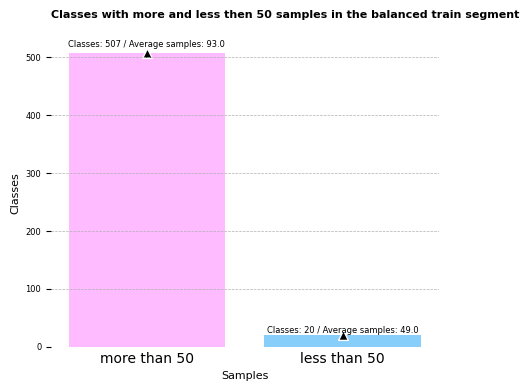

In [26]:
# Erstelle eine größere Figur und Achse
figsize = (5, 4)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

# Erstelle eine zusätzliche Spalte für die Gruppierung
class_balance['Group'] = class_balance['Count'].apply(lambda x: 'Count > 50' if x > 50 else 'Count <= 50')

# Labels und Werte
labels = ['more than 50', 'less than 50']
values = [len(class_balance[class_balance['Group'] == 'Count > 50']),len(class_balance[class_balance['Group'] == 'Count <= 50'])]

# Labels und Werte
# Erstelle den Barplot und speichere die Balkenobjekte
bars = ax.bar(labels, values, color=['#ffbbff','#87cefa'], label=labels)  # labels hier zuweisen

# Achsen-Labels und Titel
ax.set_xlabel('Samples', fontsize=8)
ax.set_ylabel('Classes', fontsize=8)
ax.set_title('Classes with more and less then 50 samples in the balanced train segment', 
             loc='left', fontsize=8, pad=15, fontweight='bold')

# Entferne die Tick-Striche auf der x-Achse
ax.tick_params(axis='x', which='both', length=0)

# X-Ticks rotieren
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

means=[class_balance[class_balance['Group'] == 'Count > 50']['Count'].mean(), class_balance[class_balance['Group'] == 'Count <= 50']['Count'].mean()]
# Balken beschriften und kleine Dreiecke hinzufügen
for i, bar in enumerate(bars):
    bar_height = bar.get_height()  # Höhe des Balkens
    bar_x = bar.get_x() + bar.get_width() / 2  # X-Position des Balkens (Mitte des Balkens)
    
    # Zeichne den Punkt auf dem Balken
    ax.scatter(bar_x, bar_height, color='black', zorder=1, s=50, edgecolors='white', linewidth=1, marker="^")
    
    # Text oberhalb des Balkens anzeigen, Abstand vergrößern
    ax.text(
        bar_x,  # X-Position (Zentrum des Balkens)
        bar_height + (bar_height/70),  # Y-Position (jetzt weiter oben als vorher, mit Abstand)
        f"Classes: {round(bar.get_height(), 3)} / Average samples: {round(means[i],0)}" ,  # Der Text (Spaltenname)
        ha='center',  # Horizontale Ausrichtung (zentriert)
        va='bottom',  # Vertikale Ausrichtung (über dem Balken)
        fontsize=6,  # Schriftgröße
        color='black',  # Schriftfarbe
    )

# Grid hinzufügen
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Setze die Schriftgröße der y-Achsen-Ticks auf 4
ax.tick_params(axis='y', labelsize=6)

filename = f"{__PATH_FOR_FIGURES__}class_balance_eval_segment.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)

# Zeige den Plot
plt.show()

### 1.3 Duration feature of the preprocessed segments 

/tmp/ipykernel_3872652/4241129576.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xticklabels,fontsize=6)


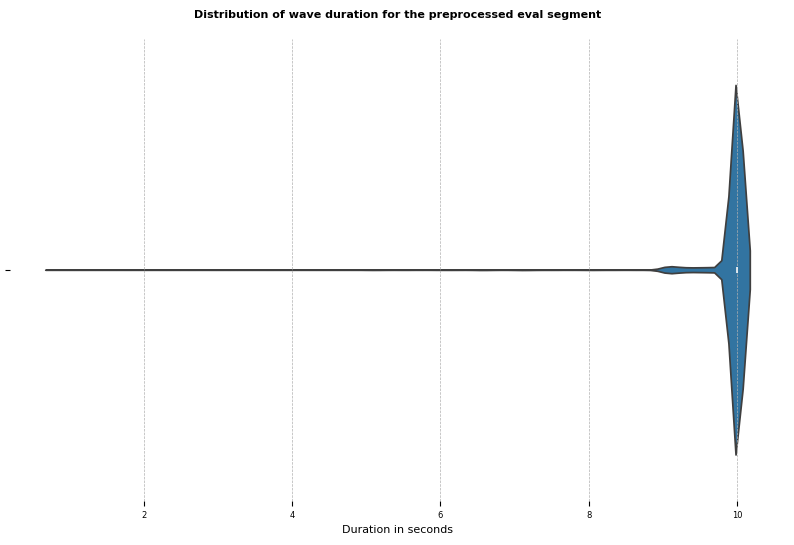

In [22]:
figsize = (10, 6)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse
sns.violinplot(data=eval_preprocessed_segment['wav_duration'], orient='h')
ax.set_title("Distribution of wave duration for the preprocessed eval segment", 
             loc='center', fontsize=8, pad=15, fontweight='bold')
ax.set_xlabel("Duration in seconds", fontsize=8)
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(labels=xticklabels,fontsize=6)
# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
filename = f"{__PATH_FOR_FIGURES__}eval_segment_duration.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

/tmp/ipykernel_3872652/1300881469.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xticklabels,fontsize=6)


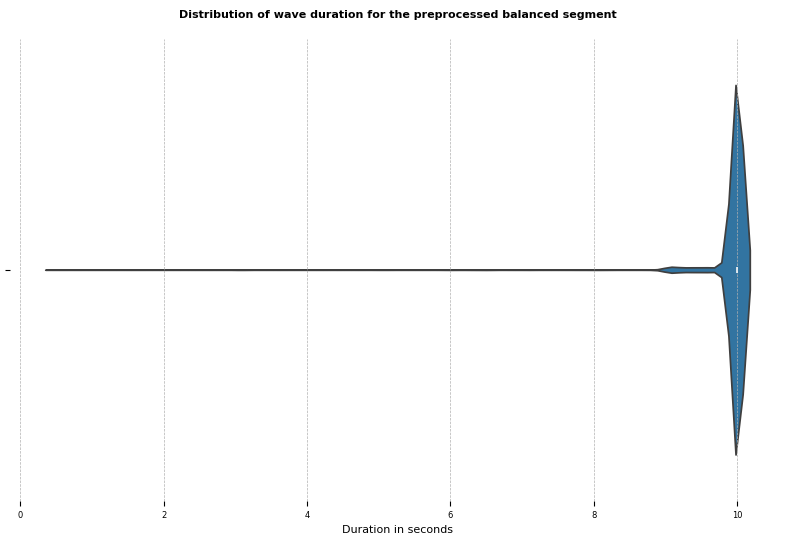

In [23]:
figsize = (10, 6)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

sns.violinplot(data=balanced_preprocessed_segment['wav_duration'], orient='h')
ax.set_title("Distribution of wave duration for the preprocessed balanced segment", 
             loc='center', fontsize=8, pad=15, fontweight='bold')
ax.set_xlabel("Duration in seconds", fontsize=8)
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(labels=xticklabels,fontsize=6)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
filename = f"{__PATH_FOR_FIGURES__}balanced_segment_duration.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

/tmp/ipykernel_3872652/1439854872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xticklabels,fontsize=6)


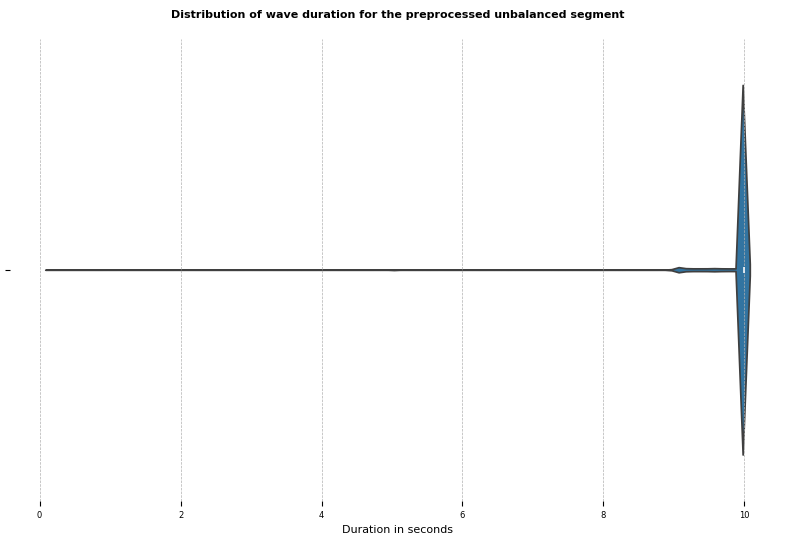

In [24]:
figsize = (10, 6)
fig, ax = plt.subplots(figsize=figsize)  # Setze die Größe der gesamten Figur und die Achse

sns.violinplot(data=unbalanced_preprocessed_segment['wav_duration'], orient='h')
ax.set_title("Distribution of wave duration for the preprocessed unbalanced segment", 
             loc='center', fontsize=8, pad=15, fontweight='bold')
ax.set_xlabel("Duration in seconds", fontsize=8)
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(labels=xticklabels,fontsize=6)

# Entferne die Ränder des Plots (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
filename = f"{__PATH_FOR_FIGURES__}unbalanced_segment_duration.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()